In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
df = pd.read_excel('./2022_MALABON DATA SHEETS_UPDATED_TRIX_21FEB2024.xlsx')
df.head()

,DISTRICT,BARANGAY,CLUSTERED PRECINCT,POLLING CENTER,PRECINCT NO.,CLUSTERED PRECINCT ID,NO. OF REGISTERED VOTERS,TURN OUT,Unnamed: 8,TOV,...,KKM (Women's),LAKAS (Political),THUNDERS (Political),SANGLAHI (LGBT),BATANG LACSON (Youth),WARRIORS (Political),REPUBLIKA (Political),Social Services Recipients,Total JORG Members,Influence
0,1,SAN AGUSTIN,1,Dela Paz ES,"0001A, 0001B,0002A, 0002B",75020001,766,585,NaN,585,...,56,21,21,11.0,4,30,NaN,83,143,2.300699
1,1,SAN AGUSTIN,2,Dela Paz ES,"0003A, 0003B,0004A, 0004B",75020002,762,527,NaN,527,...,73,22,16,4.0,11,8,NaN,84,134,2.231343
2,1,SAN AGUSTIN,3,Dela Paz ES,"0005A, 0005B,0006A, 0006B",75020003,747,556,NaN,556,...,34,11,38,0.0,2,12,NaN,29,97,3.000000
3,1,SAN AGUSTIN,4,Dela Paz ES,"0007A, 0008A,0009A, 0010A",75020004,759,533,NaN,533,...,21,11,44,3.0,1,16,NaN,35,96,3.010417
4,1,SAN AGUSTIN,5,Dela Paz ES,"0011A, 0012A,0012B, 0012C",75020005,770,546,NaN,546,...,9,30,79,3.0,1,13,NaN,52,135,2.488889


In [3]:
df.describe()

,DISTRICT,CLUSTERED PRECINCT,CLUSTERED PRECINCT ID,NO. OF REGISTERED VOTERS,TURN OUT,Unnamed: 8,TOV,JAYE LACSON NOEL,RICKY SANDOVAL,Unnamed: 12,...,KKM (Women's),LAKAS (Political),THUNDERS (Political),SANGLAHI (LGBT),BATANG LACSON (Youth),WARRIORS (Political),REPUBLIKA (Political),Social Services Recipients,Total JORG Members,Influence
count,355.000000,355.000000,3.550000e+02,355.000000,355.000000,0.0,355.000000,355.000000,355.000000,0.0,...,355.000000,355.000000,355.000000,354.000000,355.000000,355.000000,169.000000,355.000000,355.000000,355.000000
mean,1.476056,178.000000,7.692210e+07,727.084507,552.726761,NaN,551.983099,288.225352,225.602817,NaN,...,32.216901,29.340845,23.670423,3.042373,4.704225,9.743662,17.674556,44.194366,102.709859,3.365790
std,0.500131,102.623909,3.583495e+07,72.997939,59.008917,NaN,60.630536,54.211502,43.874468,NaN,...,23.983416,19.705728,15.815179,2.857506,5.143133,11.424979,11.423425,22.566261,41.347061,2.317555
min,1.000000,1.000000,7.502000e+07,451.000000,265.000000,NaN,265.000000,119.000000,110.000000,NaN,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000,1.110345
25%,1.000000,89.500000,7.502009e+07,703.000000,526.000000,NaN,526.000000,260.000000,194.500000,NaN,...,15.000000,15.500000,12.000000,1.000000,1.000000,1.000000,10.000000,28.000000,73.000000,2.252041
50%,1.000000,178.000000,7.502018e+07,758.000000,566.000000,NaN,566.000000,290.000000,229.000000,NaN,...,26.000000,25.000000,20.000000,2.000000,3.000000,6.000000,16.000000,41.000000,98.000000,2.801724
75%,2.000000,266.500000,7.502027e+07,778.000000,591.500000,NaN,591.500000,322.000000,255.500000,NaN,...,43.000000,39.000000,32.000000,5.000000,6.000000,14.000000,23.000000,55.000000,129.000000,3.865162
max,2.000000,355.000000,7.502023e+08,800.000000,689.000000,NaN,689.000000,476.000000,337.000000,NaN,...,165.000000,142.000000,96.000000,15.000000,44.000000,93.000000,52.000000,131.000000,290.000000,34.200000


In [4]:
df.shape

(355, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DISTRICT                    355 non-null    int64  
 1   BARANGAY                    355 non-null    object 
 2   CLUSTERED PRECINCT          355 non-null    int64  
 3   POLLING CENTER              355 non-null    object 
 4   PRECINCT NO.                355 non-null    object 
 5   CLUSTERED PRECINCT ID       355 non-null    int64  
 6   NO. OF REGISTERED VOTERS    355 non-null    int64  
 7   TURN OUT                    355 non-null    int64  
 8   Unnamed: 8                  0 non-null      float64
 9   TOV                         355 non-null    int64  
 10  JAYE LACSON NOEL            355 non-null    int64  
 11  RICKY SANDOVAL              355 non-null    int64  
 12  Unnamed: 12                 0 non-null      float64
 13  JEANNIE SANDOVAL            355 non

In [11]:
print('Influence Ratio vs JORG Member Count')
xs, ys = [], []
for i in range(1, 35):
    x = f'{i}, {i}.9'
    y = df[(df['Influence'] >= i) & (df['Influence'] < i+1)]['Total  JORG Members'].sum()
    xs.append(x)
    ys.append(y)
    print(f'({x}): ',  int(y))

Influence Ratio vs JORG Member Count
(1, 1.9):  8598
(2, 2.9):  16630
(3, 3.9):  6955
(4, 4.9):  2043
(5, 5.9):  1538
(6, 6.9):  240
(7, 7.9):  206
(8, 8.9):  142
(9, 9.9):  0
(10, 10.9):  29
(11, 11.9):  44
(12, 12.9):  0
(13, 13.9):  0
(14, 14.9):  27
(15, 15.9):  0
(16, 16.9):  0
(17, 17.9):  0
(18, 18.9):  0
(19, 19.9):  0
(20, 20.9):  0
(21, 21.9):  0
(22, 22.9):  0
(23, 23.9):  0
(24, 24.9):  0
(25, 25.9):  0
(26, 26.9):  0
(27, 27.9):  0
(28, 28.9):  0
(29, 29.9):  0
(30, 30.9):  0
(31, 31.9):  0
(32, 32.9):  0
(33, 33.9):  0
(34, 34.9):  10


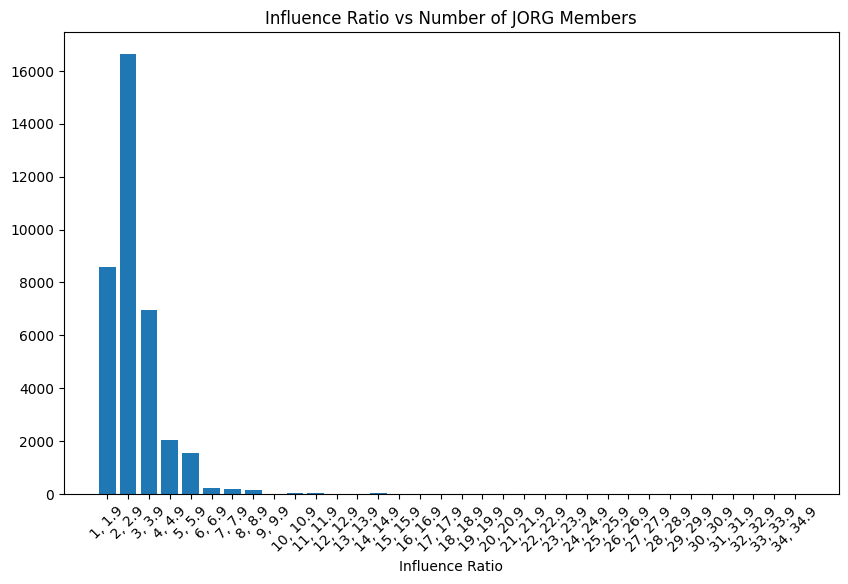

In [31]:
plt.figure(figsize=(10,6))
plt.bar(xs, ys)
plt.xlabel('Influence Ratio')
plt.title('Influence Ratio vs Number of JORG Members')
plt.xticks(rotation=45)
# plt.yscale('log')
plt.show()

number of precincts vs range
Ano ba gusto nating alamin?
yung gusto ni Peddy??
may x3 multiplier sa kada JORG member

In [27]:
df[(df['Influence'] <= 1.9) & (df['Influence'] >= 1)]['Total  JORG Members'].sum()

6412.0

In [8]:
df.columns

Index(['DISTRICT', 'BARANGAY', 'CLUSTERED PRECINCT', 'POLLING CENTER',
       'PRECINCT NO.', 'CLUSTERED PRECINCT ID', 'NO. OF REGISTERED VOTERS',
       'TURN OUT', 'Unnamed: 8', 'TOV', 'JAYE LACSON NOEL', 'RICKY SANDOVAL',
       'Unnamed: 12', 'JEANNIE SANDOVAL', 'ENZO ORETA', 'NINO LACSON NOEL',
       'KKM (Women's)', 'LAKAS (Political)', 'THUNDERS (Political)',
       'SANGLAHI (LGBT)', 'BATANG LACSON (Youth)', 'WARRIORS (Political)',
       'REPUBLIKA (Political)', 'Social Services Recipients',
       'Total  JORG Members', 'Influence'],
      dtype='object')

In [39]:
df[df['Total  JORG Members'] == 0].shape[0]

1

In [47]:
df[df['Influence'] < 2].shape[0]

54

In [71]:
df[(df['Influence'] < 1.7)]['Total  JORG Members'].sum()

3289.0

In [72]:
df[(df['Influence'] < 1.7)].shape[0]

18

In [15]:
jorgs_list = []
for ind in range(-10, -3):
    jorgs_list.append(df.columns[ind])

In [16]:
jorgs_list

["KKM (Women's)",
 'LAKAS (Political)',
 'THUNDERS (Political)',
 'SANGLAHI (LGBT)',
 'BATANG LACSON (Youth)',
 'WARRIORS (Political)',
 'REPUBLIKA (Political)']

In [18]:
df[jorgs_list].describe()

,KKM (Women's),LAKAS (Political),THUNDERS (Political),SANGLAHI (LGBT),BATANG LACSON (Youth),WARRIORS (Political),REPUBLIKA (Political)
count,377.000000,377.000000,377.000000,376.000000,377.000000,377.000000,191.000000
mean,91.010610,82.885942,66.867374,8.593085,13.289125,27.525199,46.916230
std,605.908378,555.042729,444.809083,57.134619,88.202914,183.440364,235.158722
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,16.000000,13.000000,1.000000,2.000000,2.000000,8.000000
50%,27.000000,28.000000,22.000000,3.000000,4.000000,7.000000,15.000000
75%,48.000000,41.000000,35.000000,5.000000,7.000000,15.000000,23.500000
max,11437.000000,10416.000000,8403.000000,1077.000000,1670.000000,3459.000000,2987.000000


ValueError: x and y must have same first dimension, but have shapes (109,) and (108,)

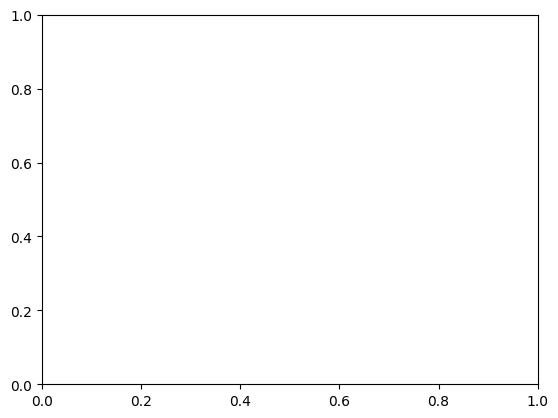

In [19]:
plt.plot(df[jorgs_list[0]].unique(),df[jorgs_list[0]].value_counts())
plt.show()

In [20]:
df[jorgs_list[0]].unique()

array([5.6000e+01, 7.3000e+01, 3.4000e+01, 2.1000e+01, 9.0000e+00,
       1.4000e+01, 1.5000e+01, 7.0000e+00, 2.4000e+01, 8.0000e+00,
       3.0800e+02,        nan, 3.3000e+01, 9.1000e+01, 1.2200e+02,
       1.0500e+02, 8.8000e+01, 1.1200e+02, 1.6500e+02, 9.4000e+01,
       9.8000e+01, 8.2000e+01, 2.3000e+01, 1.3000e+01, 3.0000e+00,
       1.0550e+03, 3.1000e+01, 3.2000e+01, 2.7000e+01, 7.1000e+01,
       6.6000e+01, 7.2000e+01, 9.0000e+01, 8.1000e+01, 4.9400e+02,
       4.2000e+01, 1.6000e+01, 3.8000e+01, 7.7000e+01, 5.3000e+01,
       2.8000e+01, 2.0000e+01, 2.9000e+01, 2.6000e+01, 8.0000e+01,
       1.3600e+02, 5.7400e+02, 5.0000e+00, 2.5000e+01, 2.2000e+01,
       1.2000e+01, 1.9500e+02, 9.6000e+01, 4.3000e+01, 4.4000e+01,
       6.0000e+00, 6.4000e+01, 4.1000e+02, 3.0000e+01, 3.5000e+01,
       1.1000e+01, 1.2600e+02, 5.1000e+01, 1.7600e+02, 4.0000e+01,
       3.6000e+01, 6.0000e+01, 1.9000e+01, 3.9000e+01, 3.7600e+02,
       4.0000e+00, 1.0000e+01, 1.7300e+02, 4.1000e+01, 7.9000e

In [23]:
df[jorgs_list[0]].value_counts()

KKM (Women's)
26.0       13
24.0       12
15.0       11
12.0       11
22.0       10
           ..
79.0        1
83.0        1
67.0        1
112.0       1
11437.0     1
Name: count, Length: 108, dtype: int64